<a href="https://colab.research.google.com/github/Moomen123Msaadi/BigData/blob/main/tunisian_prediction_presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Donnees SocioEconomique Tunisienne**

In [ ]:
from pyspark.sql import SparkSession
# Importer SparkSession pour créer un environnement Spark
from pyspark.sql.functions import col, round, lit, abs
# Importer des fonctions pour manipuler les colonnes
from pyspark.ml.feature import VectorAssembler
# Importer pour combiner plusieurs colonnes en un vecteur
from pyspark.ml.regression import LinearRegression
# Importer pour appliquer la régression linéaire
from pyspark.sql.types import IntegerType
# Importer pour définir des colonnes de type entier
from pyspark.ml.evaluation import RegressionEvaluator
# Importer pour évaluer les modèles de régression

In [ ]:
# Créer une SparkSession
spark = SparkSession.builder.appName("Prediction").getOrCreate()

In [ ]:
# Charger un fichier CSV dans un DataFrame avec les noms de colonnes et le typage automatique
data = spark.read.csv("aaa.csv", header=True, inferSchema=True)

# Afficher les 20 premières lignes du DataFrame
data.show()

+-----+------------------+---------------------------+--------------------+--------------------+-------------------------------------------------+----------------+-----------------------------------------+-----------------------------------------+
|annee|nombre_de_salaries|estimation_de_la_population|evolution_du_smag_dj|evolution_du_smig_dh|indice_prix_a_la_consommation_familiale(2015 deb)|evolution_de_pcf|taux_brut_de_natalite_pour_1000_habitants|taux_brut_de_moralite_Pour_1000_habitants|
+-----+------------------+---------------------------+--------------------+--------------------+-------------------------------------------------+----------------+-----------------------------------------+-----------------------------------------+
| 2000|          757430.1|                    9552500|                 5.8|               0.923|                                             NULL|            NULL|                                     17.1|                                      5.6|
| 2001| 

In [ ]:
# Filtrer les lignes où l'année (annee) est 2015 ou plus
data_2015 = data.filter(col("annee") >= 2015)

# Sélectionner uniquement les colonnes nécessaires
data_2015_onwards = data_2015.select(
    "annee",  # Colonne représentant l'année
    "indice_prix_a_la_consommation_familiale(2015 deb)",  # Indice des prix à la consommation familial (base 2015)
    "evolution_de_pcf"  # Évolution de l'indice des prix à la consommation
)

# Afficher les 20 premières lignes du résultat
data_2015_onwards.show()

+-----+-------------------------------------------------+----------------+
|annee|indice_prix_a_la_consommation_familiale(2015 deb)|evolution_de_pcf|
+-----+-------------------------------------------------+----------------+
| 2015|                                            100.0|             4.9|
| 2016|                                            103.6|             3.7|
| 2017|                                            109.1|             5.3|
| 2018|                                            117.1|             7.5|
| 2019|                                            125.0|             6.7|
| 2020|                                            132.0|             5.6|
| 2021|                                            139.6|             5.7|
| 2022|                                            151.1|             8.3|
+-----+-------------------------------------------------+----------------+



In [ ]:
# Assembler la colonne 'annee' dans une colonne de vecteurs 'features' pour le machine learning
assembler = VectorAssembler(inputCols=["annee"], outputCol="features")

# Transformer les données filtrées (à partir de 2015) pour inclure une colonne 'features'
data_2015_features = assembler.transform(data_2015_onwards)

# Transformer les données de toutes les années pour inclure une colonne 'features'
data_all_features = assembler.transform(data)

# Afficher les données transformées pour les années à partir de 2015
data_2015_features.show()

# Afficher les données transformées pour toutes les années
data_all_features.show()

+-----+-------------------------------------------------+----------------+--------+
|annee|indice_prix_a_la_consommation_familiale(2015 deb)|evolution_de_pcf|features|
+-----+-------------------------------------------------+----------------+--------+
| 2015|                                            100.0|             4.9|[2015.0]|
| 2016|                                            103.6|             3.7|[2016.0]|
| 2017|                                            109.1|             5.3|[2017.0]|
| 2018|                                            117.1|             7.5|[2018.0]|
| 2019|                                            125.0|             6.7|[2019.0]|
| 2020|                                            132.0|             5.6|[2020.0]|
| 2021|                                            139.6|             5.7|[2021.0]|
| 2022|                                            151.1|             8.3|[2022.0]|
+-----+-------------------------------------------------+----------------+--

In [ ]:
# Entraîner des modèles de régression linéaire

# Modèles utilisant les données pour toutes les années
lr_salaries = LinearRegression(featuresCol="features", labelCol="nombre_de_salaries")
model_salaries = lr_salaries.fit(data_all_features)

lr_population = LinearRegression(featuresCol="features", labelCol="estimation_de_la_population")
model_population = lr_population.fit(data_all_features)

lr_smag = LinearRegression(featuresCol="features", labelCol="evolution_du_smag_dj")
model_smag = lr_smag.fit(data_all_features)

lr_smig = LinearRegression(featuresCol="features", labelCol="evolution_du_smig_dh")
model_smig = lr_smig.fit(data_all_features)

lr_tn = LinearRegression(featuresCol="features", labelCol="taux_brut_de_natalite_pour_1000_habitants")
model_tn = lr_tn.fit(data_all_features)

lr_tm = LinearRegression(featuresCol="features", labelCol="taux_brut_de_moralite_Pour_1000_habitants")
model_tm = lr_tm.fit(data_all_features)

# Modèles utilisant uniquement les données de 2015 et après
lr_cpi = LinearRegression(featuresCol="features", labelCol="indice_prix_a_la_consommation_familiale(2015 deb)")
model_cpi = lr_cpi.fit(data_2015_features)

lr_pcf = LinearRegression(featuresCol="features", labelCol="evolution_de_pcf")
model_pcf = lr_pcf.fit(data_2015_features)

# Afficher les résumés des modèles entraînés
print("")
print("nombre_de_salaries:")
print(f"Coefficients: {model_salaries.coefficients}, Intercept: {model_salaries.intercept}")

print("")
print("estimation_de_la_population:")
print(f"Coefficients: {model_population.coefficients}, Intercept: {model_population.intercept}")

print("")
print("evolution_du_smag_dj:")
print(f"Coefficients: {model_smag.coefficients}, Intercept: {model_smag.intercept}")

print("")
print("evolution_du_smig_dh:")
print(f"Coefficients: {model_smig.coefficients}, Intercept: {model_smig.intercept}")

# Résumés pour les données de 2015 et après
print("")
print("indice_prix_a_la_consommation_familiale(2015 deb):")
print(f"Coefficients: {model_cpi.coefficients}, Intercept: {model_cpi.intercept}")

print("")
print("evolution_de_pcf:")
print(f"Coefficients: {model_pcf.coefficients}, Intercept: {model_pcf.intercept}")

# Résumés pour toutes les années
print("")
print("taux_brut_de_natalite_pour_1000_habitants:")
print(f"Coefficients: {model_tn.coefficients}, Intercept: {model_tn.intercept}")

print("")
print("taux_brut_de_moralite_Pour_1000_habitants:")
print(f"Coefficients: {model_tm.coefficients}, Intercept: {model_tm.intercept}")



nombre_de_salaries:
Coefficients: [16487.430217500623], Intercept: -32197386.704350267

estimation_de_la_population:
Coefficients: [109364.46739213663], Intercept: -209235110.36036935

evolution_du_smag_dj:
Coefficients: [0.5637351778696703], Intercept: -1123.1931818263415

evolution_du_smig_dh:
Coefficients: [0.055972332016215966], Intercept: -111.12240316287117

indice_prix_a_la_consommation_familiale(2015 deb):
Coefficients: [7.313095237579464], Intercept: -14639.295237054148

evolution_de_pcf:
Coefficients: [0.40357142854320155], Intercept: -808.6464285144522

taux_brut_de_natalite_pour_1000_habitants:
Coefficients: [-0.05691699604790503], Intercept: 132.0818181827718

taux_brut_de_moralite_Pour_1000_habitants:
Coefficients: [0.06343873517822911], Intercept: -121.57964426950566


In [ ]:
# Créer un DataFrame contenant les années futures de 2023 à 2042
future_years = spark.createDataFrame([(year,) for year in range(2023, 2043)], ["annee"])

# Transformer les années futures en une colonne 'features' pour les modèles
future_features = assembler.transform(future_years)

In [ ]:
# Prédiction des valeurs futures à l'aide des modèles entraînés

# Prédiction de la population pour les années futures (Modèle Population)
predicted_population = model_population.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_population")

# Prédiction des salaires pour les années futures (Modèle Salaires)
predicted_salaries = model_salaries.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_salaries")

# Prédiction de l'évolution du SMAG pour les années futures (Modèle SMAG)
predicted_smag = model_smag.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_smag")

# Prédiction de l'évolution du SMIG pour les années futures (Modèle SMIG)
predicted_smig = model_smig.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_smig")

# Prédiction de l'indice des prix à la consommation familial (base 2015) pour les années futures (Modèle CPI)
predicted_cpi = model_cpi.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_cpi")

# Prédiction de l'évolution de l'PCF pour les années futures (Modèle PCF)
predicted_pcf = model_pcf.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_pcf")

# Prédiction du taux brut de natalité pour les années futures (Modèle Natalité)
predicted_tn = model_tn.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_tn")

# Prédiction du taux brut de mortalité pour les années futures (Modèle Mortalité)
predicted_tm = model_tm.transform(future_features).select("annee", "prediction").withColumnRenamed("prediction", "predicted_tm")

In [ ]:
# Arrondi des prédictions

# Arrondi de la prédiction de la population à un entier
predicted_population = predicted_population.withColumn("predicted_population", col("predicted_population").cast(IntegerType()))

# Arrondi des prédictions de salaires à un entier
predicted_salaries = predicted_salaries.withColumn("predicted_salaries", col("predicted_salaries").cast(IntegerType()))

# Arrondi des prédictions de SMAG à deux décimales
predicted_smag = predicted_smag.withColumn("predicted_smag", round(col("predicted_smag"), 2))

# Arrondi des prédictions de SMIG à deux décimales
predicted_smig = predicted_smig.withColumn("predicted_smig", round(col("predicted_smig"), 2))

# Arrondi des prédictions de CPI (indice des prix) à deux décimales
predicted_cpi = predicted_cpi.withColumn("predicted_cpi", round(col("predicted_cpi"), 2))

# Arrondi des prédictions de PCF à deux décimales
predicted_pcf = predicted_pcf.withColumn("predicted_pcf", round(col("predicted_pcf"), 2))

# Arrondi des prédictions de taux brut de natalité à deux décimales
predicted_tn = predicted_tn.withColumn("predicted_tn", round(col("predicted_tn"), 2))

# Arrondi des prédictions de taux brut de mortalité à deux décimales
predicted_tm = predicted_tm.withColumn("predicted_tm", round(col("predicted_tm"), 2))

In [ ]:
# Combiner les prédictions dans un seul DataFrame
final_predictions = predicted_population.join(predicted_salaries, "annee").join(predicted_smag, "annee").join(predicted_smig, "annee").join(predicted_cpi, "annee").join(predicted_pcf, "annee").join(predicted_tn, "annee").join(predicted_tm, "annee")

# Afficher les prédictions finales
final_predictions.show()  # Affiche le DataFrame combiné avec toutes les prédictions par année

+-----+--------------------+------------------+--------------+--------------+-------------+-------------+------------+------------+
|annee|predicted_population|predicted_salaries|predicted_smag|predicted_smig|predicted_cpi|predicted_pcf|predicted_tn|predicted_tm|
+-----+--------------------+------------------+--------------+--------------+-------------+-------------+------------+------------+
| 2023|            12009207|           1156684|         17.24|          2.11|        155.1|         7.78|       16.94|        6.76|
| 2024|            12118571|           1173172|         17.81|          2.17|       162.41|         8.18|       16.88|        6.82|
| 2025|            12227936|           1189659|         18.37|          2.22|       169.72|         8.59|       16.82|        6.88|
| 2026|            12337300|           1206146|         18.93|          2.28|       177.04|         8.99|       16.77|        6.95|
| 2027|            12446665|           1222634|          19.5|          2.33

## **Representation des donnees**

In [ ]:
import pandas as pd  # Importation de la bibliothèque pandas pour la manipulation de données sous forme de DataFrame
import matplotlib.pyplot as plt  # Importation de matplotlib.pyplot pour la création de graphiques

In [ ]:
# ----- Collecte des données depuis le DataFrame Spark -----

# Collecte des données historiques de population depuis 'data'
pop_data = data.select(
    col('annee'),
    col('estimation_de_la_population').alias('population')  # Renommage de la colonne 'estimation_de_la_population' en 'population'
).collect()  # Collecte des données sous forme de liste d'enregistrements

# Collecte des données prédites de population depuis 'final_predictions'
predi_pop = final_predictions.select(
    col('annee'),
    col('predicted_population').alias('population')  # Renommage de la colonne 'predicted_population' en 'population'
).collect()  # Collecte des données sous forme de liste d'enregistrements

# Combinaison des données historiques et prédites de population et tri par année
combined_pop_data = pop_data + predi_pop
combined_pop_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

# Collecte des données historiques des salaires depuis 'data'
salaries_hist = data.select(
    col('annee'),
    col('nombre_de_salaries').alias('salary')  # Renommage de la colonne 'nombre_de_salaries' en 'salary'
).collect()

# Collecte des données prédites des salaires depuis 'final_predictions'
salaries_pred = final_predictions.select(
    col('annee'),
    col('predicted_salaries').alias('salary')  # Renommage de la colonne 'predicted_salaries' en 'salary'
).collect()

# Combinaison des données historiques et prédites des salaires et tri par année
combined_salaries_data = salaries_hist + salaries_pred
combined_salaries_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

# Collecte des données historiques du SMAG depuis 'data'
smag_hist = data.select(
    col('annee'),
    col('evolution_du_smag_dj').alias('smag')  # Renommage de la colonne 'evolution_du_smag_dj' en 'smag'
).collect()

# Collecte des données prédites du SMAG depuis 'final_predictions'
smag_pred = final_predictions.select(
    col('annee'),
    col('predicted_smag').alias('smag')  # Renommage de la colonne 'predicted_smag' en 'smag'
).collect()

# Combinaison des données historiques et prédites du SMAG et tri par année
combined_smag_data = smag_hist + smag_pred
combined_smag_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

# Collecte des données historiques du SMIG depuis 'data'
smig_hist = data.select(
    col('annee'),
    col('evolution_du_smig_dh').alias('smig')  # Renommage de la colonne 'evolution_du_smig_dh' en 'smig'
).collect()

# Collecte des données prédites du SMIG depuis 'final_predictions'
smig_pred = final_predictions.select(
    col('annee'),
    col('predicted_smig').alias('smig')  # Renommage de la colonne 'predicted_smig' en 'smig'
).collect()

# Combinaison des données historiques et prédites du SMIG et tri par année
combined_smig_data = smig_hist + smig_pred
combined_smig_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

# Collecte des données historiques de l'indice des prix à la consommation (CPI) depuis 'data'
cpi_hist = data.select(
    col('annee'),
    col('indice_prix_a_la_consommation_familiale(2015 deb)').alias('cpi')  # Renommage de la colonne 'indice_prix_a_la_consommation_familiale' en 'cpi'
).collect()

# Collecte des données prédites du CPI depuis 'final_predictions'
cpi_pred = final_predictions.select(
    col('annee'),
    col('predicted_cpi').alias('cpi')  # Renommage de la colonne 'predicted_cpi' en 'cpi'
).collect()

# Combinaison des données historiques et prédites du CPI et tri par année
combined_cpi_data = cpi_hist + cpi_pred
combined_cpi_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

# Collecte des données historiques du PCF depuis 'data'
pcf_hist = data.select(
    col('annee'),
    col('evolution_de_pcf').alias('pcf')  # Renommage de la colonne 'evolution_de_pcf' en 'pcf'
).collect()

# Collecte des données prédites du PCF depuis 'final_predictions'
pcf_pred = final_predictions.select(
    col('annee'),
    col('predicted_pcf').alias('pcf')  # Renommage de la colonne 'predicted_pcf' en 'pcf'
).collect()

# Combinaison des données historiques et prédites du PCF et tri par année
combined_pcf_data = pcf_hist + pcf_pred
combined_pcf_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

# Collecte des données historiques du taux brut de natalité (TN) depuis 'data'
tn_hist = data.select(
    col('annee'),
    col('taux_brut_de_natalite_pour_1000_habitants').alias('tn')  # Renommage de la colonne 'taux_brut_de_natalite' en 'tn'
).collect()

# Collecte des données prédites du TN depuis 'final_predictions'
tn_pred = final_predictions.select(
    col('annee'),
    col('predicted_tn').alias('tn')  # Renommage de la colonne 'predicted_tn' en 'tn'
).collect()

# Combinaison des données historiques et prédites du TN et tri par année
combined_tn_data = tn_hist + tn_pred
combined_tn_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

# Collecte des données historiques du taux brut de mortalité (TM) depuis 'data'
tm_hist = data.select(
    col('annee'),
    col('taux_brut_de_moralite_Pour_1000_habitants').alias('tm')  # Renommage de la colonne 'taux_brut_de_moralite' en 'tm'
).collect()

# Collecte des données prédites du TM depuis 'final_predictions'
tm_pred = final_predictions.select(
    col('annee'),
    col('predicted_tm').alias('tm')  # Renommage de la colonne 'predicted_tm' en 'tm'
).collect()

# Combinaison des données historiques et prédites du TM et tri par année
combined_tm_data = tm_hist + tm_pred
combined_tm_data.sort(key=lambda x: x['annee'])  # Tri des données combinées par année

In [ ]:
# ----- Convertir les données en listes pour l'affichage -----

# Pour la population
pop_years = [row['annee'] for row in combined_pop_data]  # Extraire les années des données combinées de population
pop_values = [row['population'] for row in combined_pop_data]  # Extraire les valeurs de population des données combinées

# Pour les salaires
salaries_years = [row['annee'] for row in combined_salaries_data]  # Extraire les années des données combinées des salaires
salaries_values = [row['salary'] for row in combined_salaries_data]  # Extraire les valeurs de salaires des données combinées

# Pour le SMAG
smag_years = [row['annee'] for row in combined_smag_data]  # Extraire les années des données combinées du SMAG
smag_values = [row['smag'] for row in combined_smag_data]  # Extraire les valeurs du SMAG des données combinées

# Pour le SMIG
smig_years = [row['annee'] for row in combined_smig_data]  # Extraire les années des données combinées du SMIG
smig_values = [row['smig'] for row in combined_smig_data]  # Extraire les valeurs du SMIG des données combinées

# Pour l'indice des prix à la consommation (CPI)
cpi_years = [row['annee'] for row in combined_cpi_data]  # Extraire les années des données combinées du CPI
cpi_values = [row['cpi'] for row in combined_cpi_data]  # Extraire les valeurs du CPI des données combinées

# Pour le PCF
pcf_years = [row['annee'] for row in combined_pcf_data]  # Extraire les années des données combinées du PCF
pcf_values = [row['pcf'] for row in combined_pcf_data]  # Extraire les valeurs du PCF des données combinées

# Pour le taux brut de natalité (TN)
tn_years = [row['annee'] for row in combined_tn_data]  # Extraire les années des données combinées du TN
tn_values = [row['tn'] for row in combined_tn_data]  # Extraire les valeurs du TN des données combinées

# Pour le taux brut de mortalité (TM)
tm_years = [row['annee'] for row in combined_tm_data]  # Extraire les années des données combinées du TM
tm_values = [row['tm'] for row in combined_tm_data]  # Extraire les valeurs du TM des données combinées

In [ ]:
# ----- Créer un DataFrame Pandas pour faciliter l'affichage -----

# Création d'un DataFrame Pandas en combinant toutes les valeurs extraites précédemment.
# Chaque colonne représente une variable (année, population, salaires, SMAG, SMIG, CPI, PCF, TN, TM)
df = pd.DataFrame({
    'annee': pop_years,  # Liste des années provenant des données combinées de population
    'population': pop_values,  # Liste des valeurs de population provenant des données combinées
    'salaries': salaries_values,  # Liste des valeurs des salaires
    'smag': smag_values,  # Liste des valeurs du SMAG (Salaire Minimum Agricole Garanti)
    'smig': smig_values,  # Liste des valeurs du SMIG (Salaire Minimum Interprofessionnel Garanti)
    'cpi': cpi_values,  # Liste des valeurs de l'Indice des Prix à la Consommation (CPI)
    'pcf': pcf_values,  # Liste des valeurs du PCF (Prix des Consommations Familiales)
    'tn': tn_values,  # Liste des valeurs du Taux de Natalité
    'tm': tm_values   # Liste des valeurs du Taux de Mortalité
})


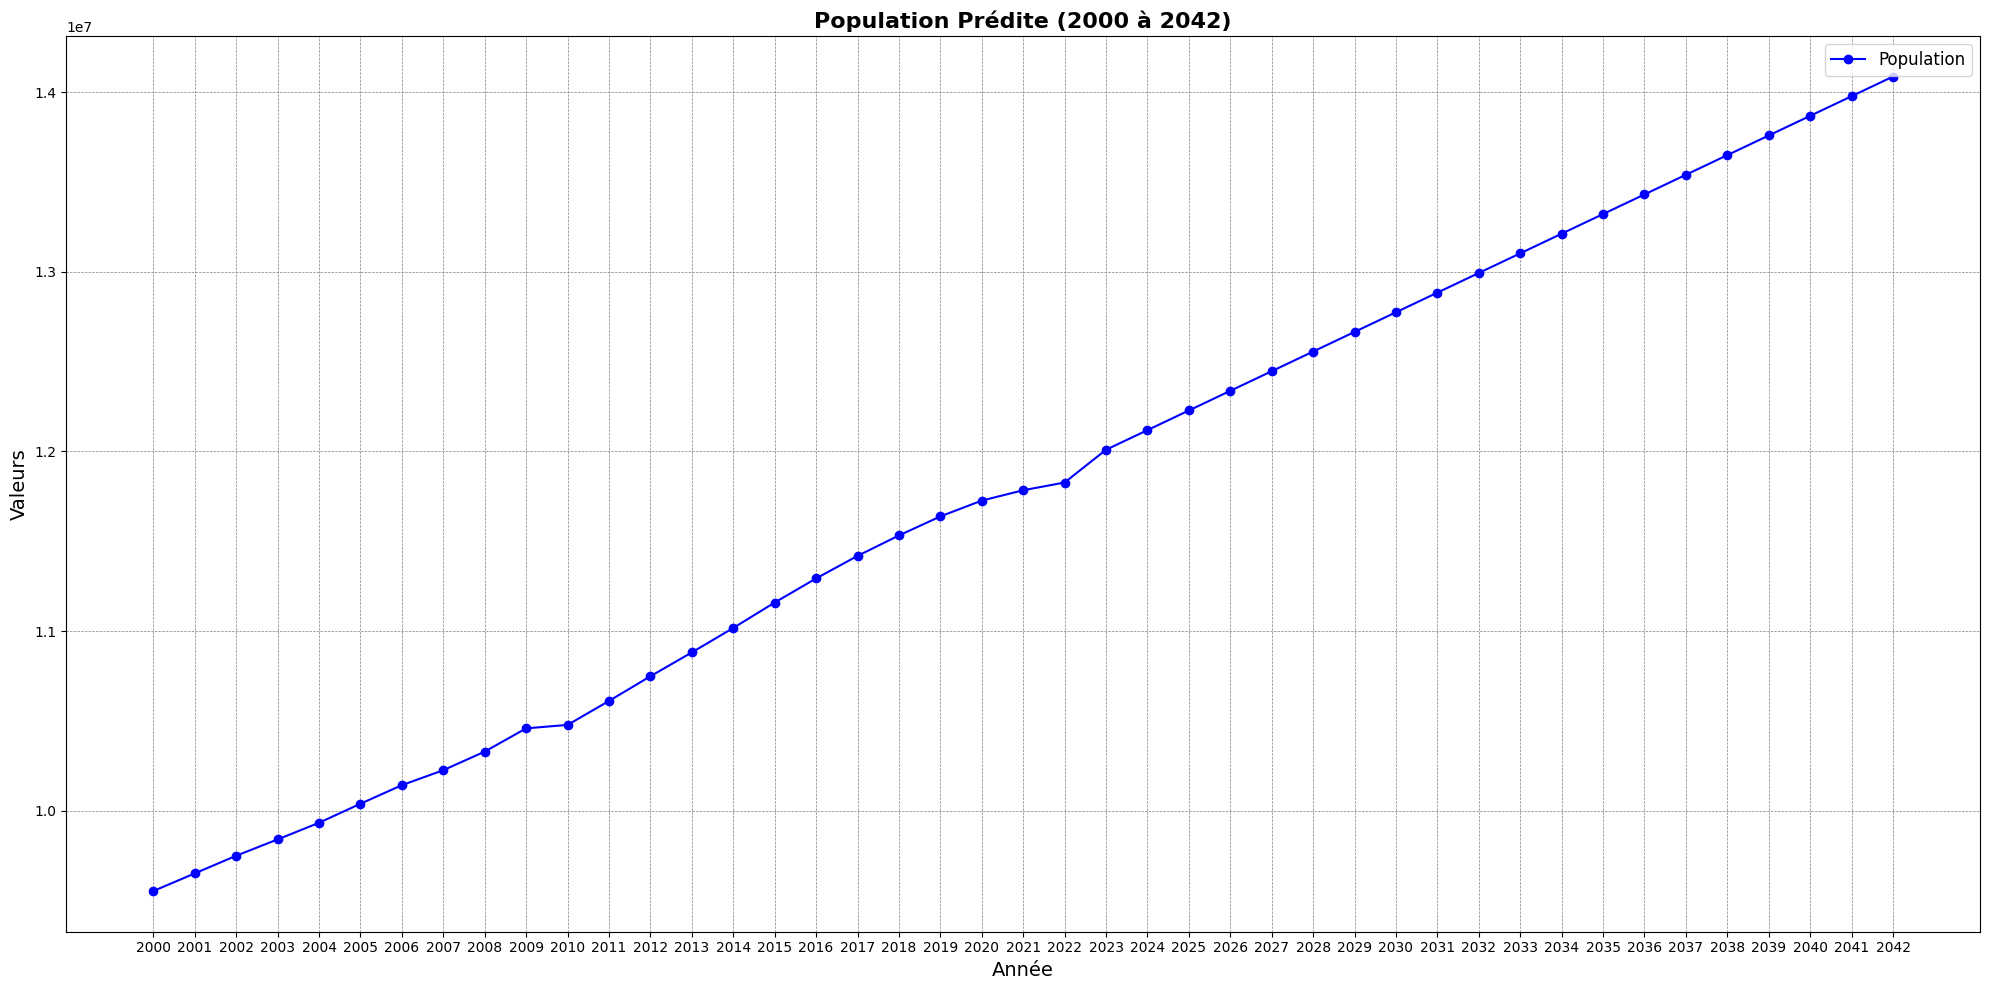

In [ ]:
# ----- Tracer avec Matplotlib -----

# Définir la taille de la figure
plt.figure(figsize=(20, 10))  # Taille de la figure (largeur, hauteur en pouces)

# Tracer la population
plt.plot(
    df['annee'], df['population'],  # Axe des x = années, Axe des y = population
    marker='o',  # Ajouter des marqueurs pour chaque point
    label='Population',  # Légende pour la courbe de la population
    color='blue'  # Couleur de la courbe
)

# Personnalisation du graphique
plt.title('Population Prédite (2000 à 2042)', fontsize=16, fontweight='bold')  # Titre du graphique
plt.xlabel('Année', fontsize=14)  # Label de l'axe des x
plt.ylabel('Valeurs', fontsize=14)  # Label de l'axe des y
plt.xticks(range(2000, 2043, 1))  # Définir les ticks sur l'axe des x pour chaque année
plt.legend(fontsize=12)  # Afficher la légende avec une taille de police de 12
plt.grid(color='gray', linestyle='--', linewidth=0.5)  # Ajouter une grille de fond (grise, en pointillés)
plt.tight_layout()  # Ajuster l'espace entre les éléments du graphique pour éviter les chevauchements

# Afficher le graphique
plt.show()  # Afficher le graphique


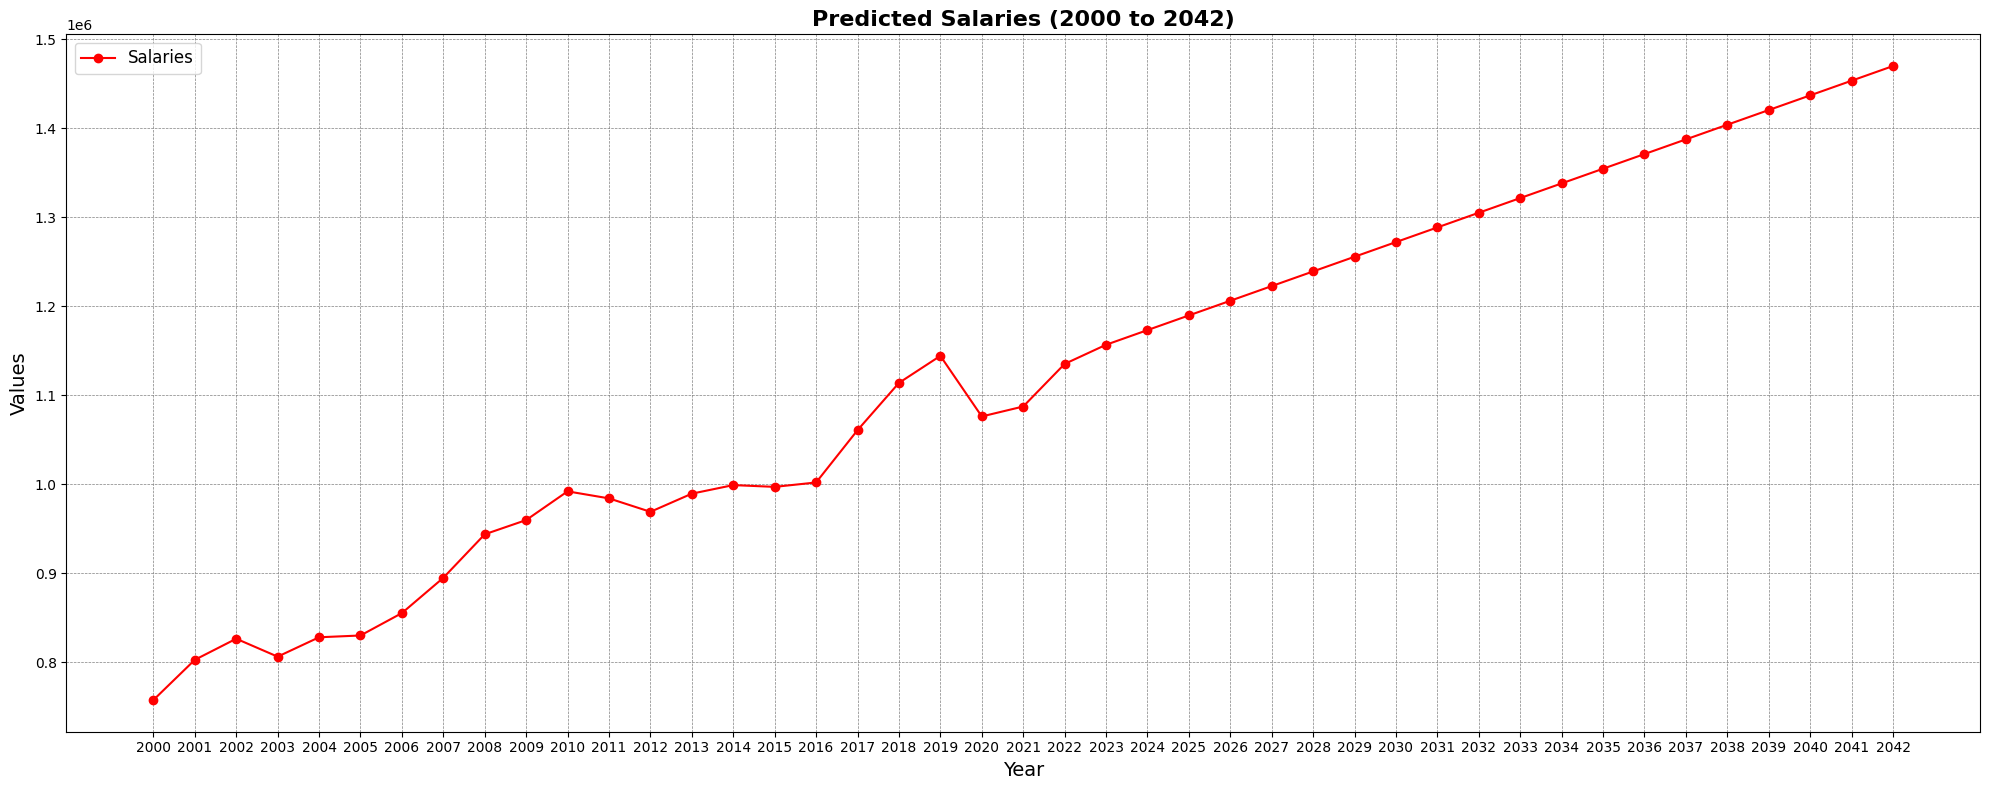

In [ ]:
plt.figure(figsize=(20, 8))

# Plot salaries
plt.plot(
    df['annee'], df['salaries'],
    marker='o', label='Salaries', color='red'
)

# Formatting the plot
plt.title('Predicted Salaries (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))  # Set x-ticks for every year
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

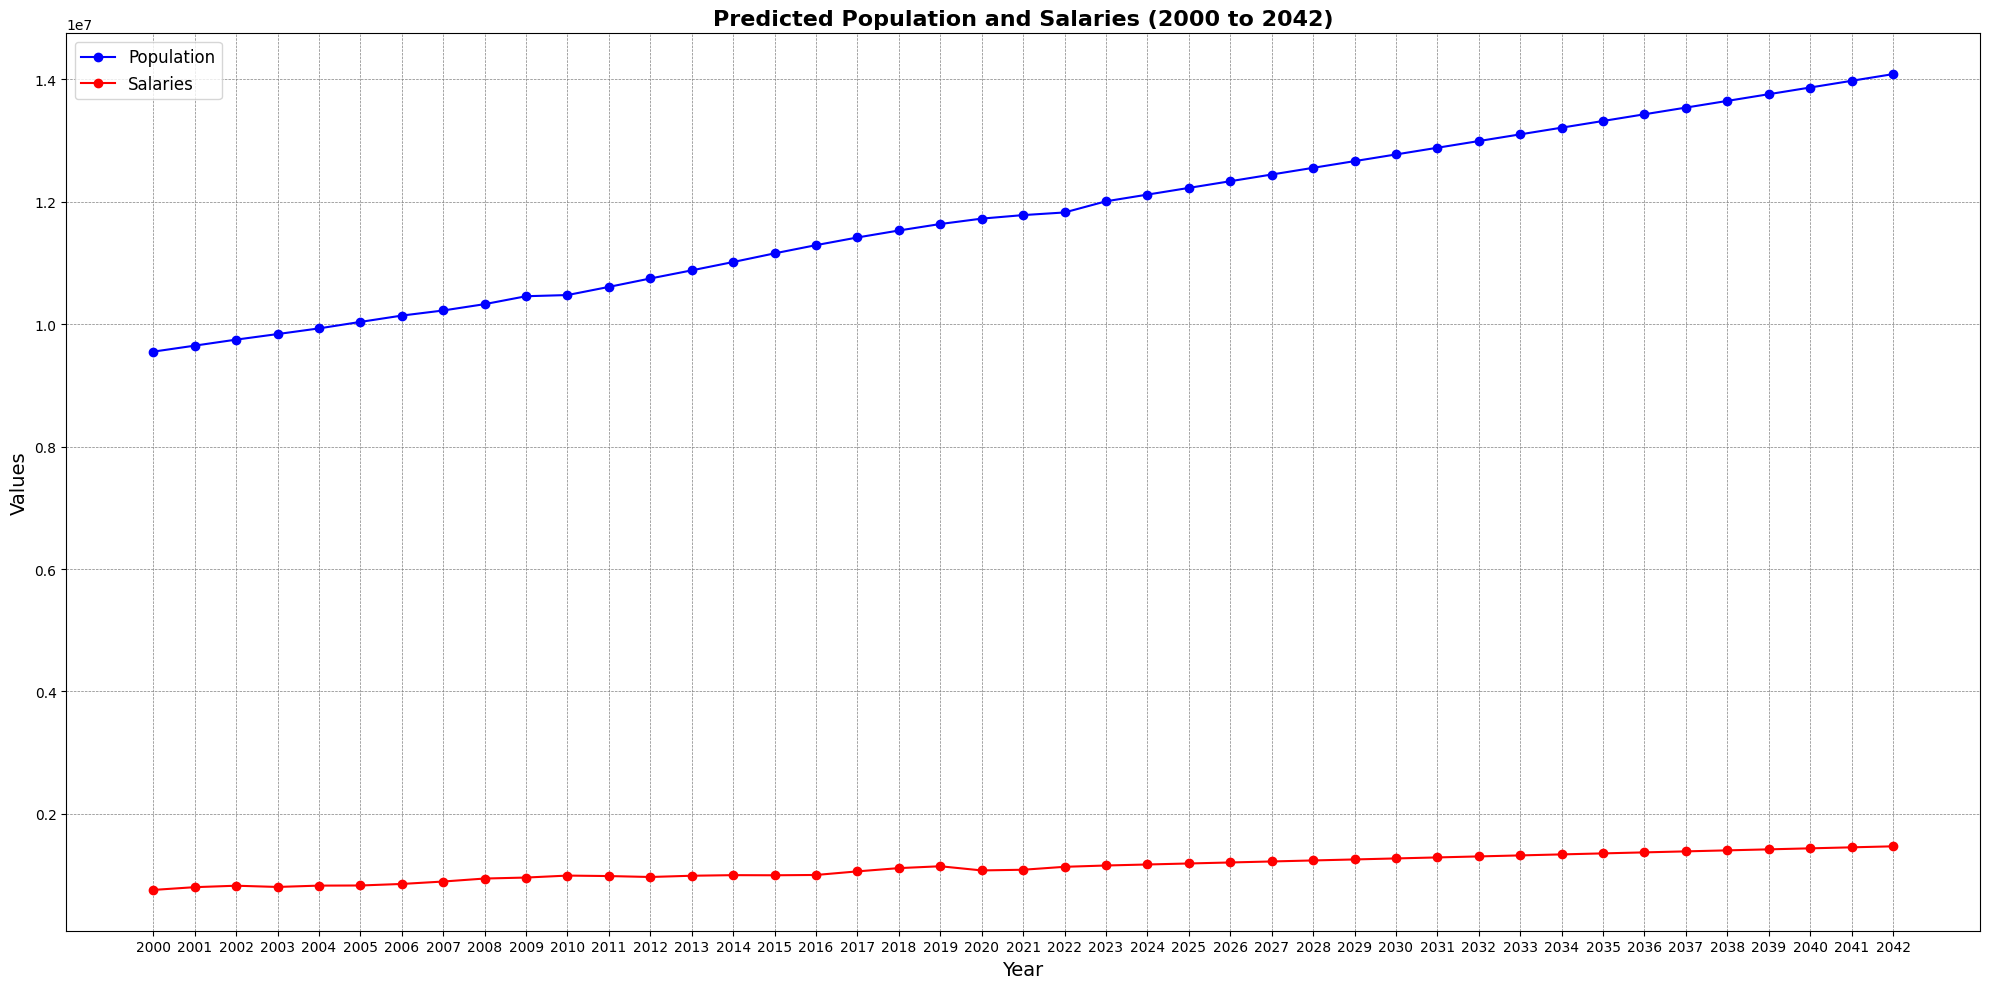

In [ ]:
plt.figure(figsize=(20, 10))

# Plot population
plt.plot(
    df['annee'], df['population'],
    marker='o', label='Population', color='blue'
)

# Plot salaries
plt.plot(
    df['annee'], df['salaries'],
    marker='o', label='Salaries', color='red'
)

# Formatting the plot
plt.title('Predicted Population and Salaries (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


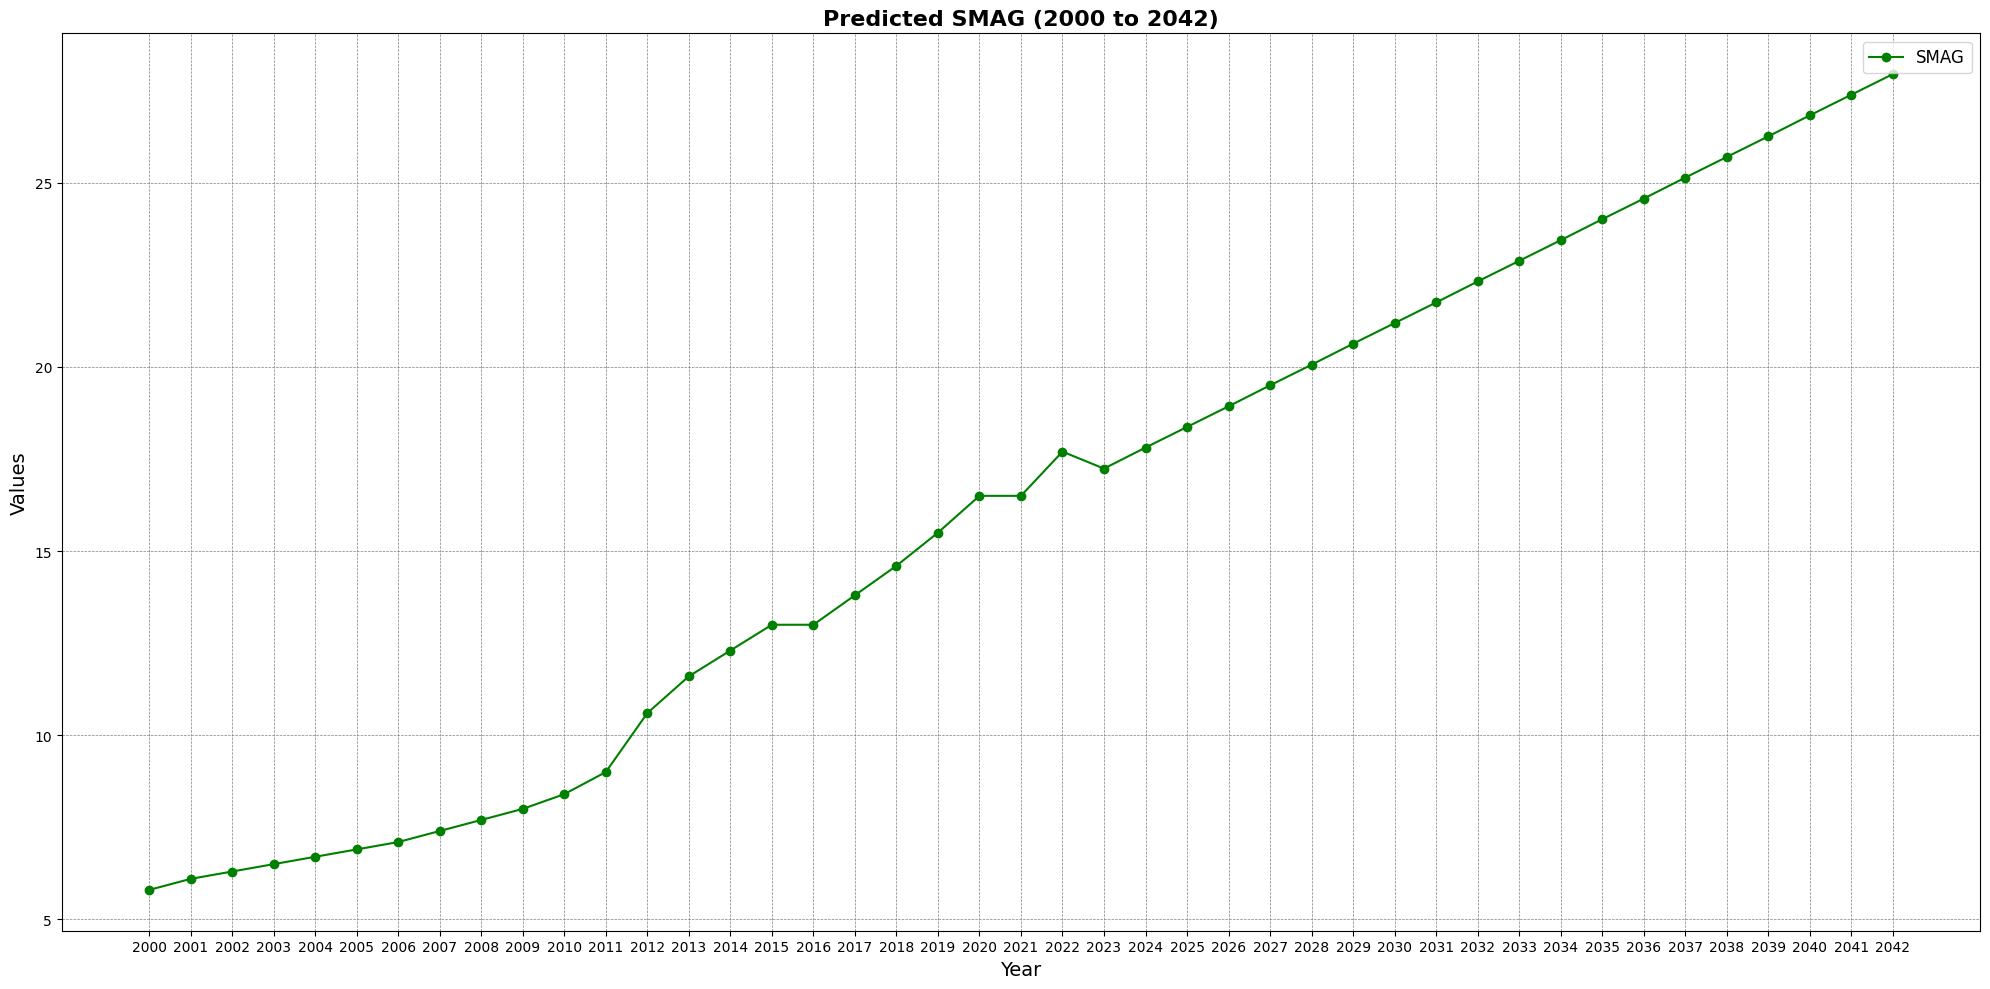

In [ ]:
plt.figure(figsize=(20, 10))

# Plot SMAG
plt.plot(
    df['annee'], df['smag'],
    marker='o', label='SMAG', color='green'
)

# Formatting the plot
plt.title('Predicted SMAG (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

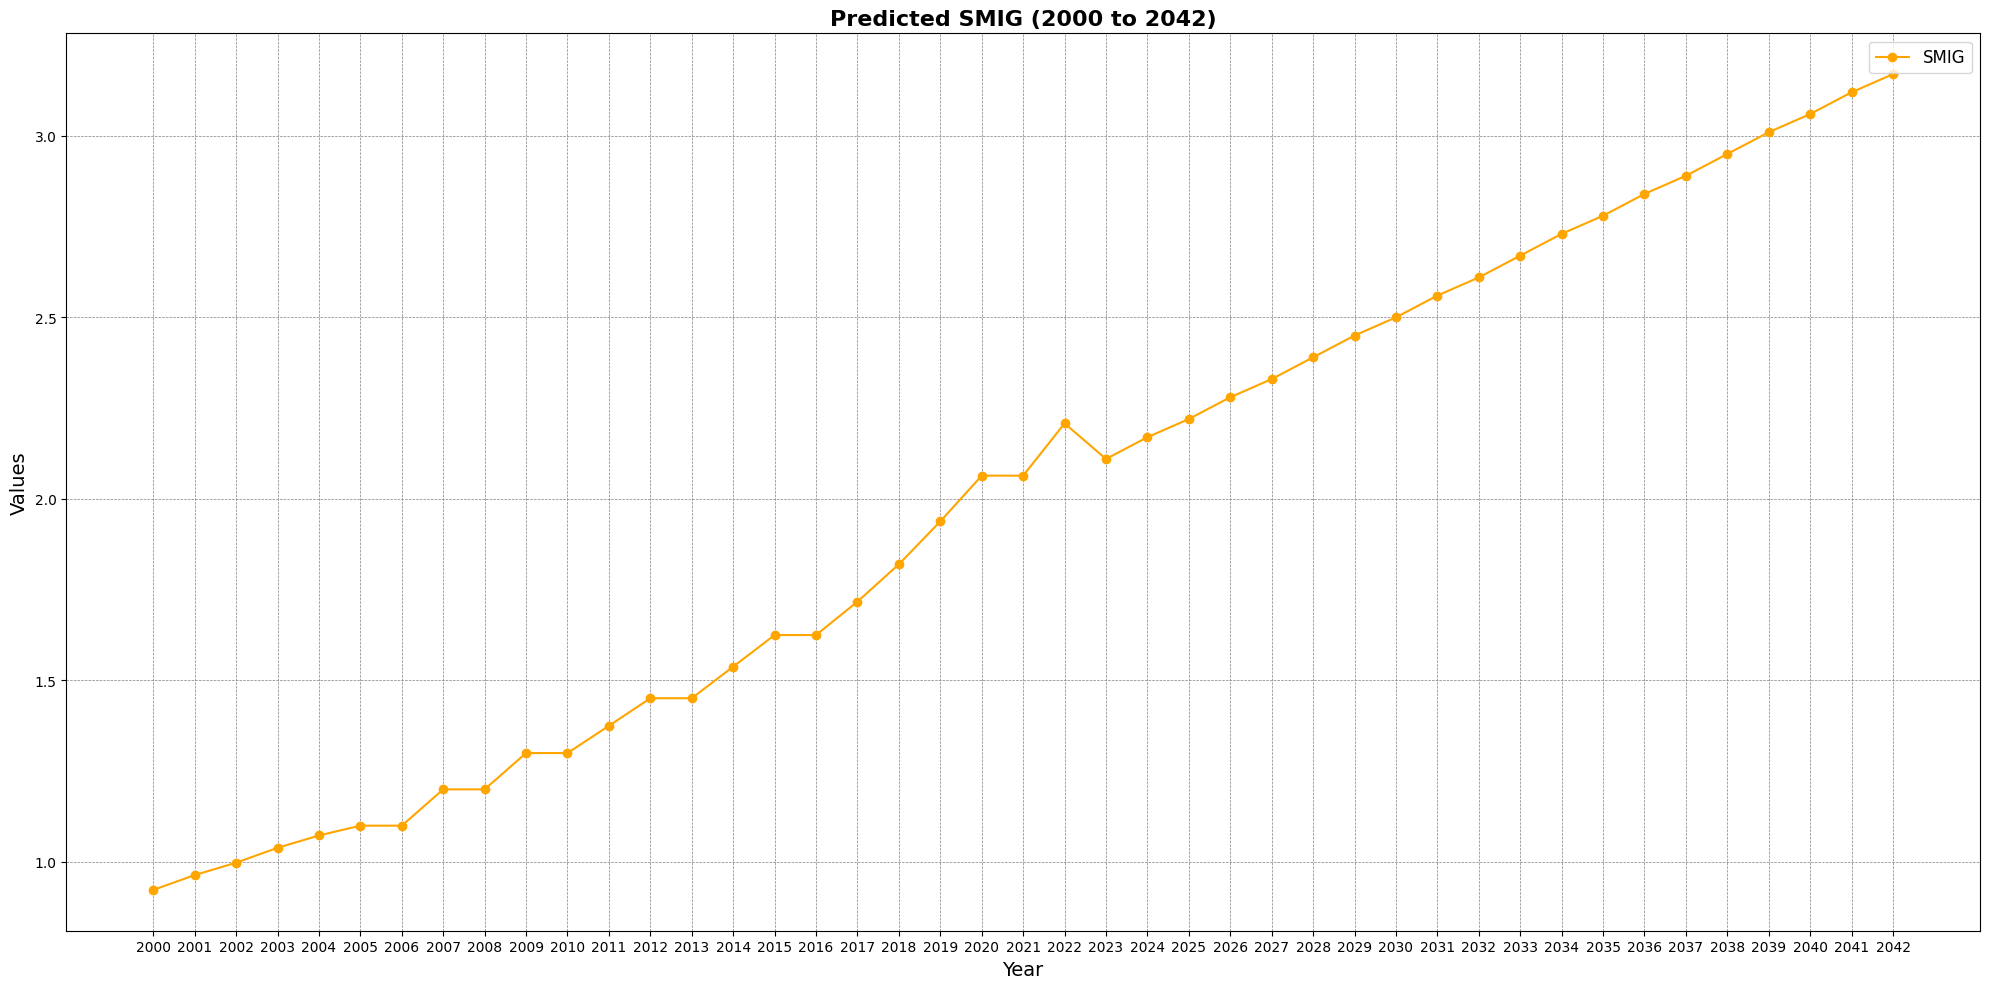

In [ ]:
plt.figure(figsize=(20, 10))

# Plot SMIG
plt.plot(
    df['annee'], df['smig'],
    marker='o', label='SMIG', color='orange'
)

# Formatting the plot
plt.title('Predicted SMIG (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

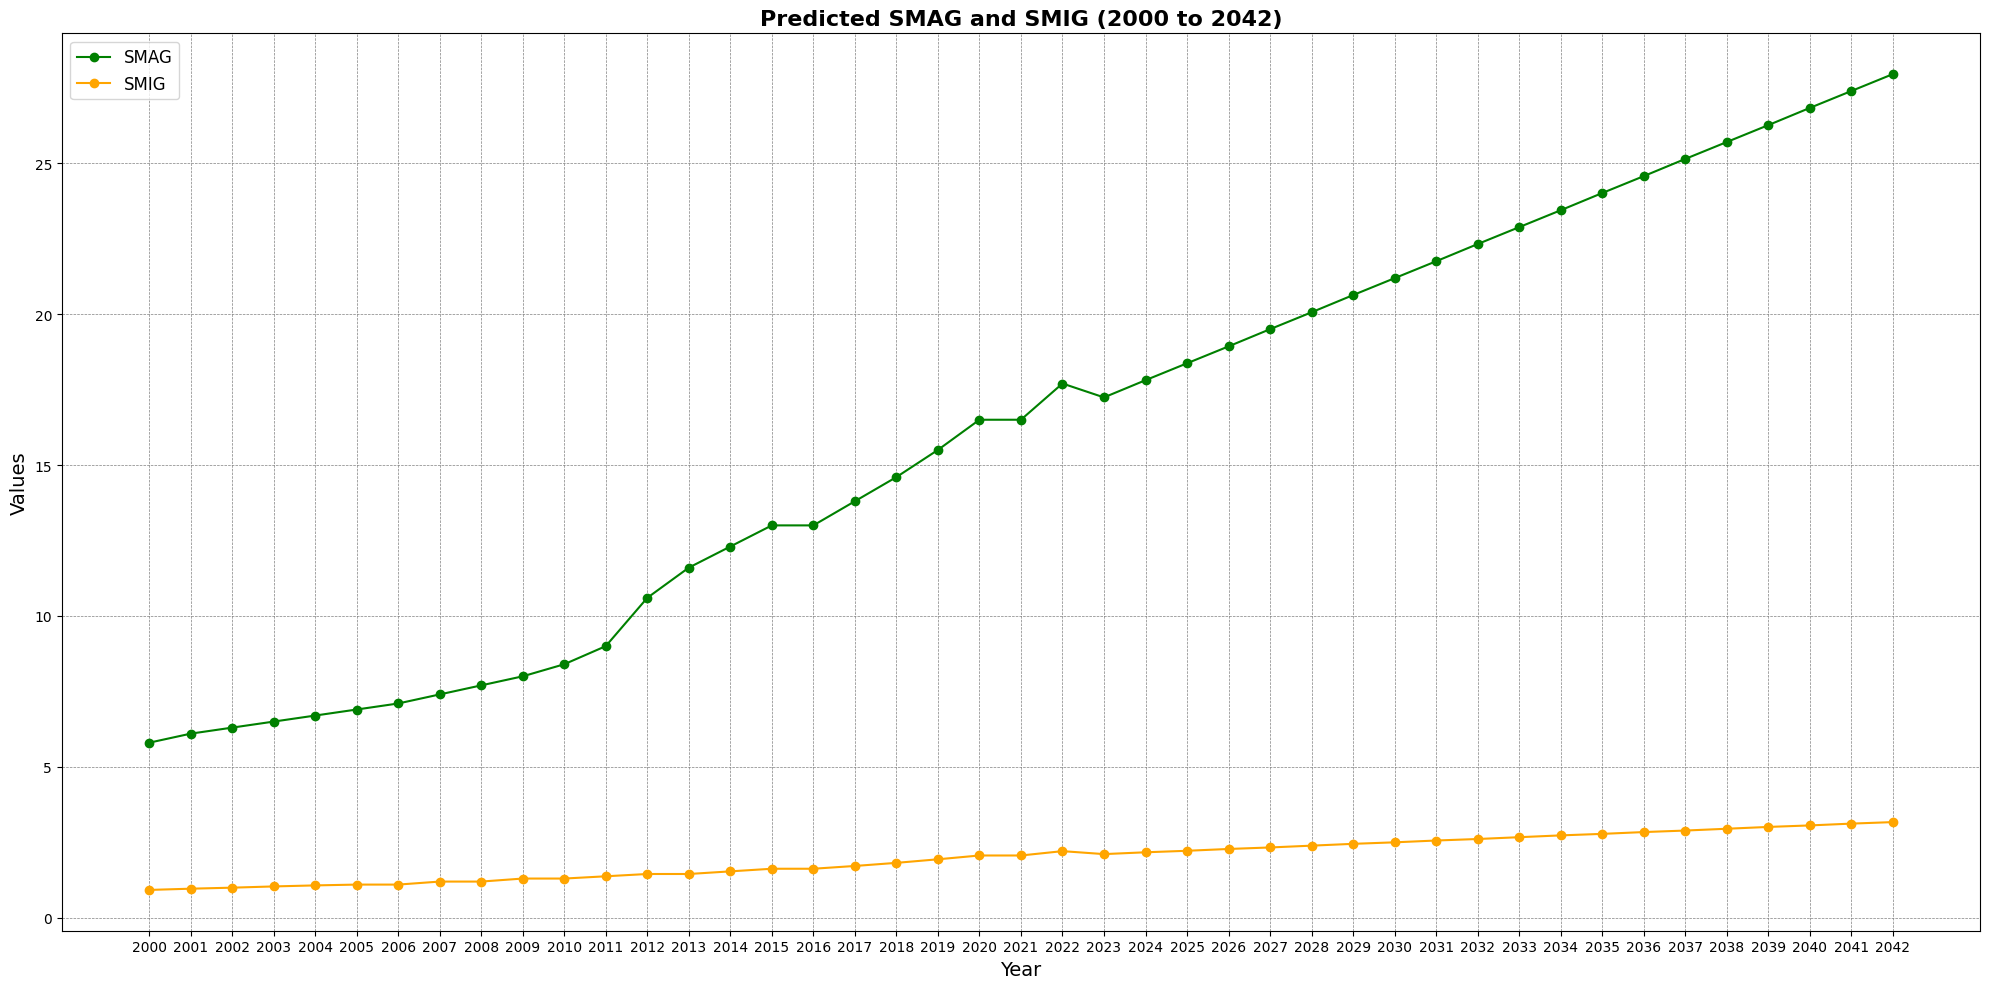

In [ ]:
plt.figure(figsize=(20, 10))

# Plot SMAG
plt.plot(
    df['annee'], df['smag'],
    marker='o', label='SMAG', color='green'
)

# Plot SMIG
plt.plot(
    df['annee'], df['smig'],
    marker='o', label='SMIG', color='orange'
)

# Formatting the plot
plt.title('Predicted SMAG and SMIG (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))  # Set x-ticks for every 5 years
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()

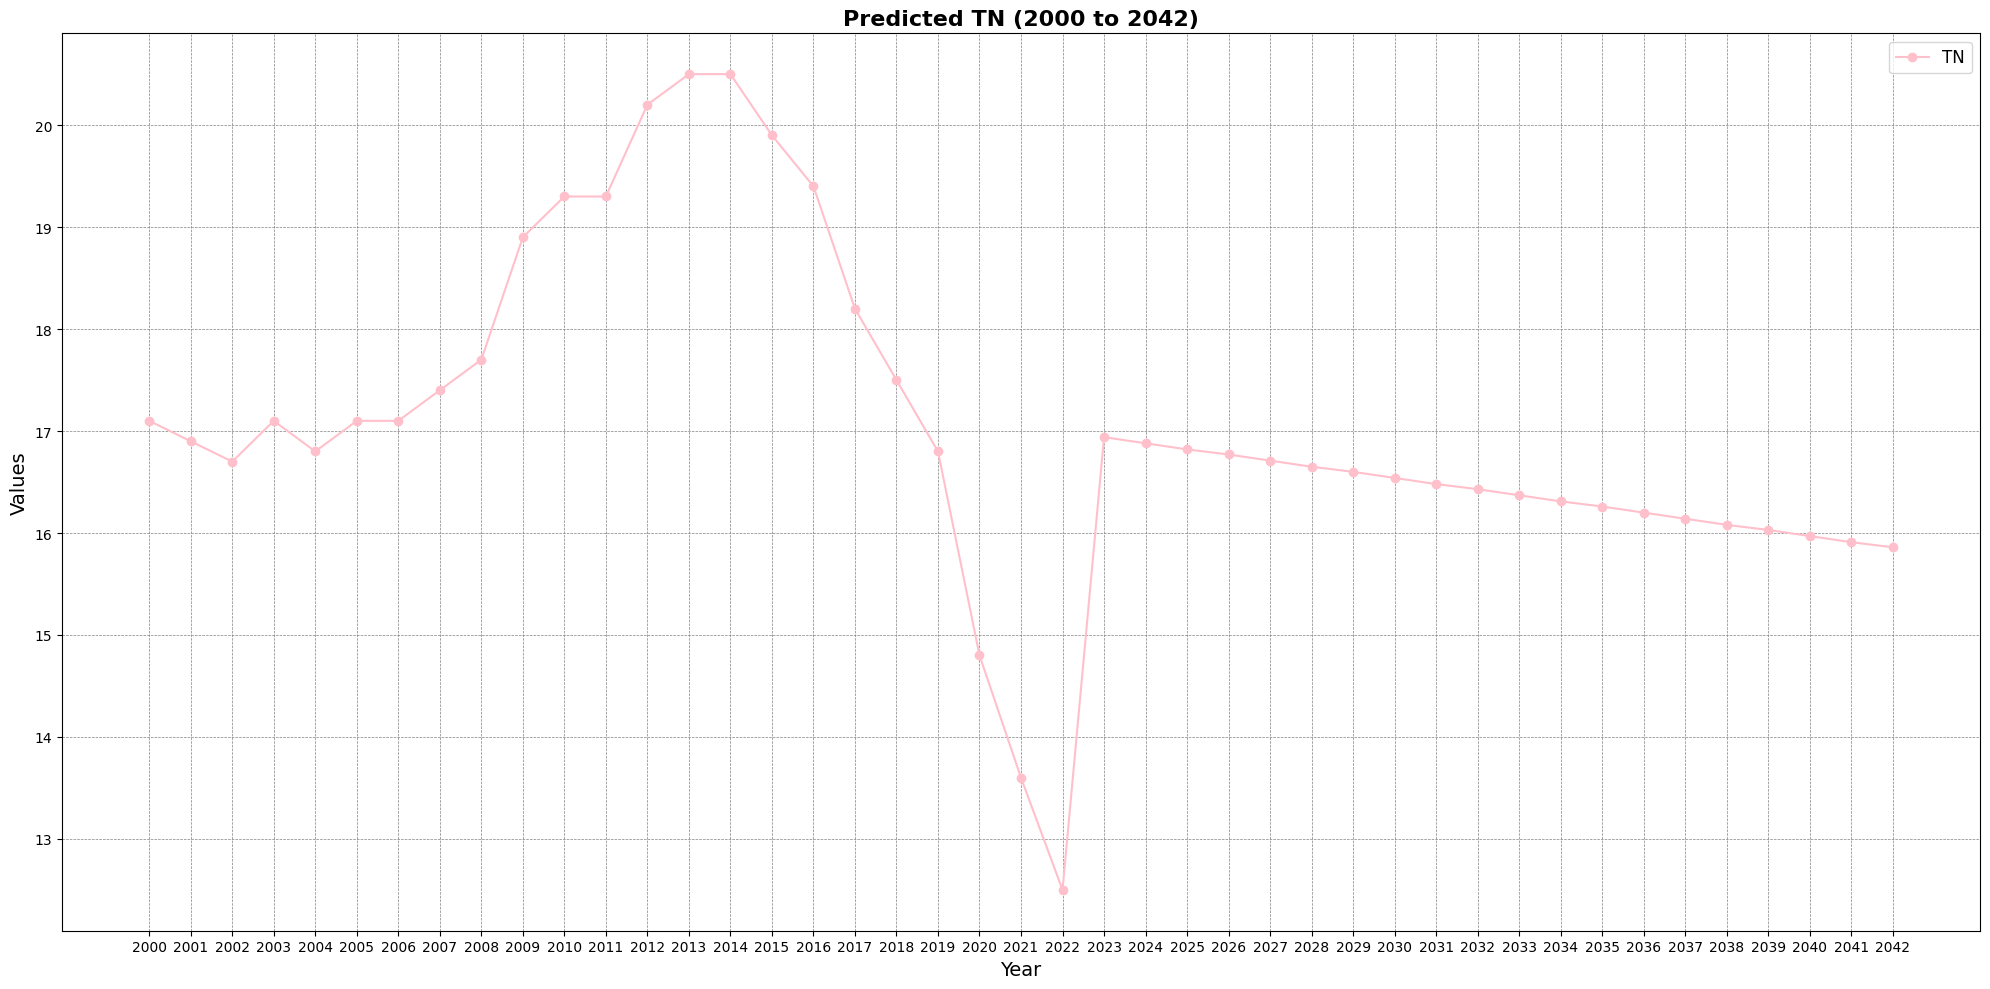

In [ ]:
plt.figure(figsize=(20, 10))

# Plot TN
plt.plot(
    df['annee'], df['tn'],
    marker='o', label='TN', color='pink'
)

# Formatting the plot
plt.title('Predicted TN (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


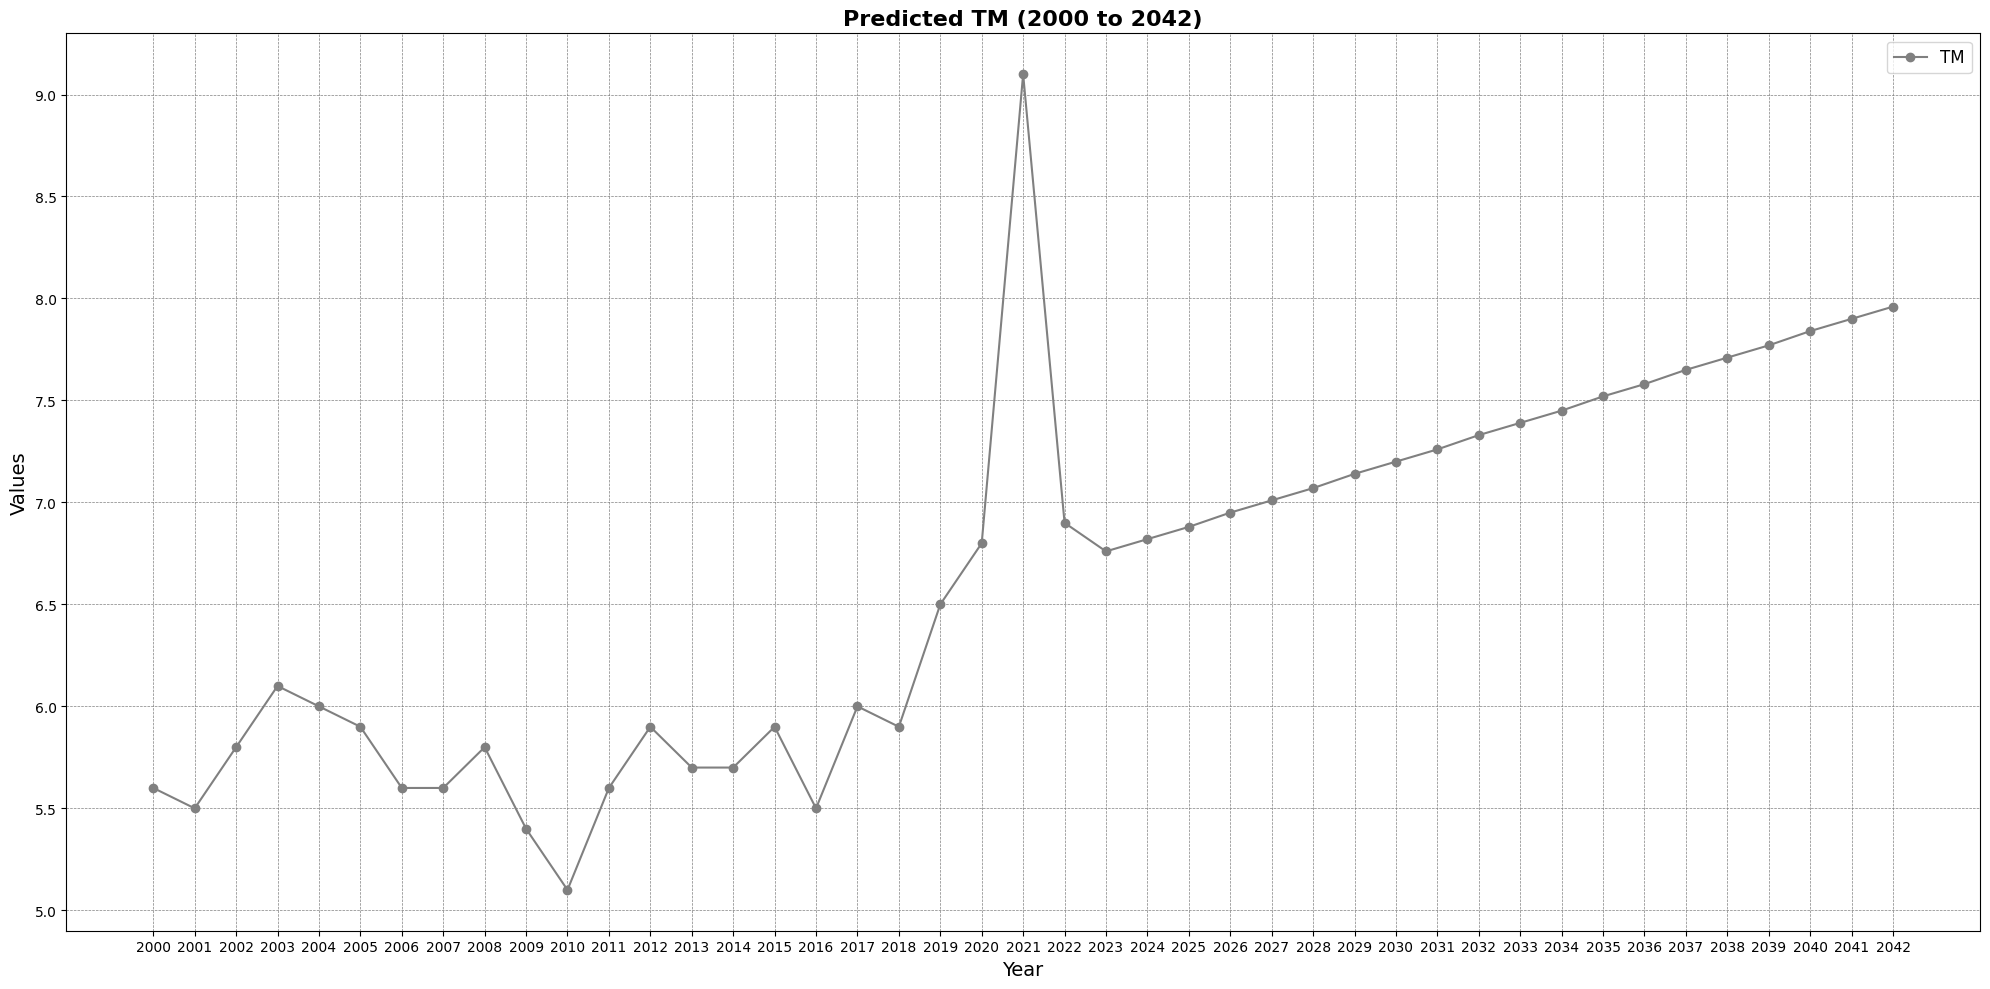

In [ ]:
plt.figure(figsize=(20, 10))

# Plot TM
plt.plot(
    df['annee'], df['tm'],
    marker='o', label='TM', color='gray'
)

# Formatting the plot
plt.title('Predicted TM (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


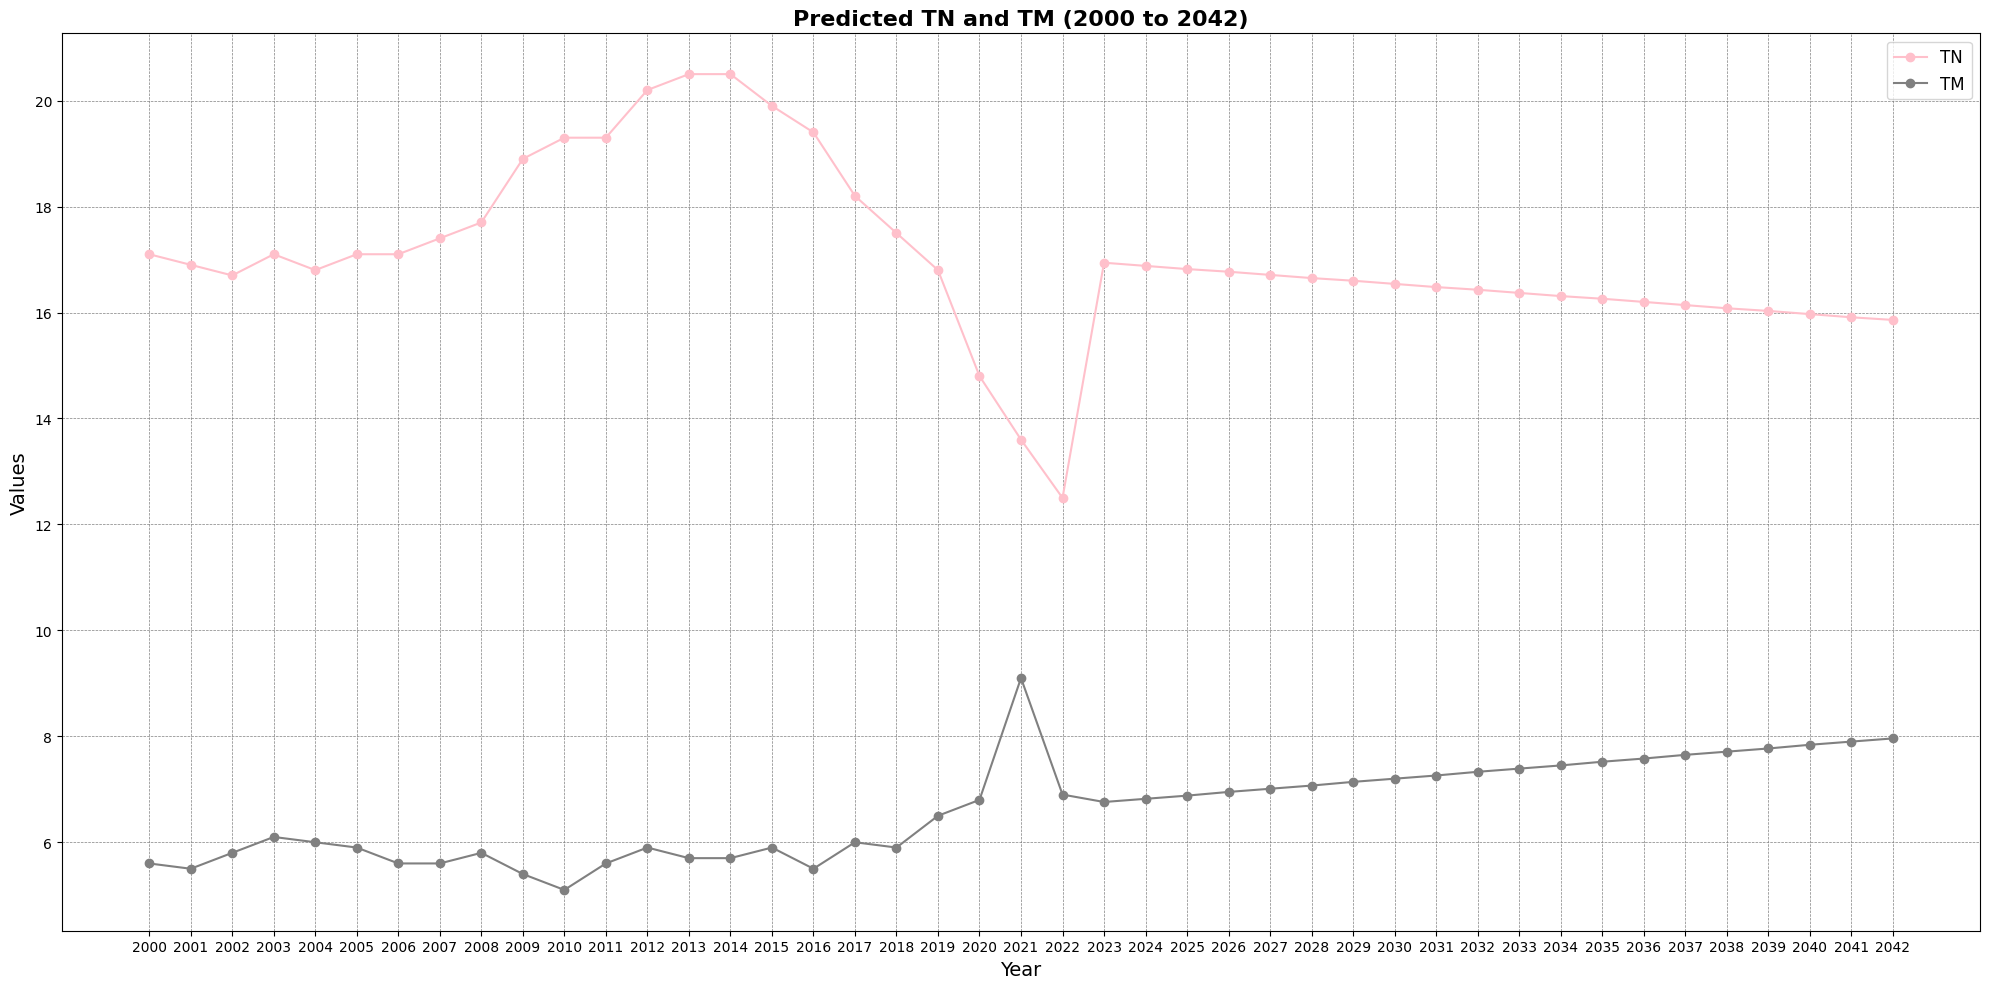

In [ ]:
# ----- Plotting TN and TM -----
plt.figure(figsize=(20, 10))

# Plot TN
plt.plot(
    df['annee'], df['tn'],
    marker='o', label='TN', color='pink'
)

# Plot TM
plt.plot(
    df['annee'], df['tm'],
    marker='o', label='TM', color='gray'
)

# Formatting the plot
plt.title('Predicted TN and TM (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(2000, 2043, 1))  # Set x-ticks for every 5 years
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


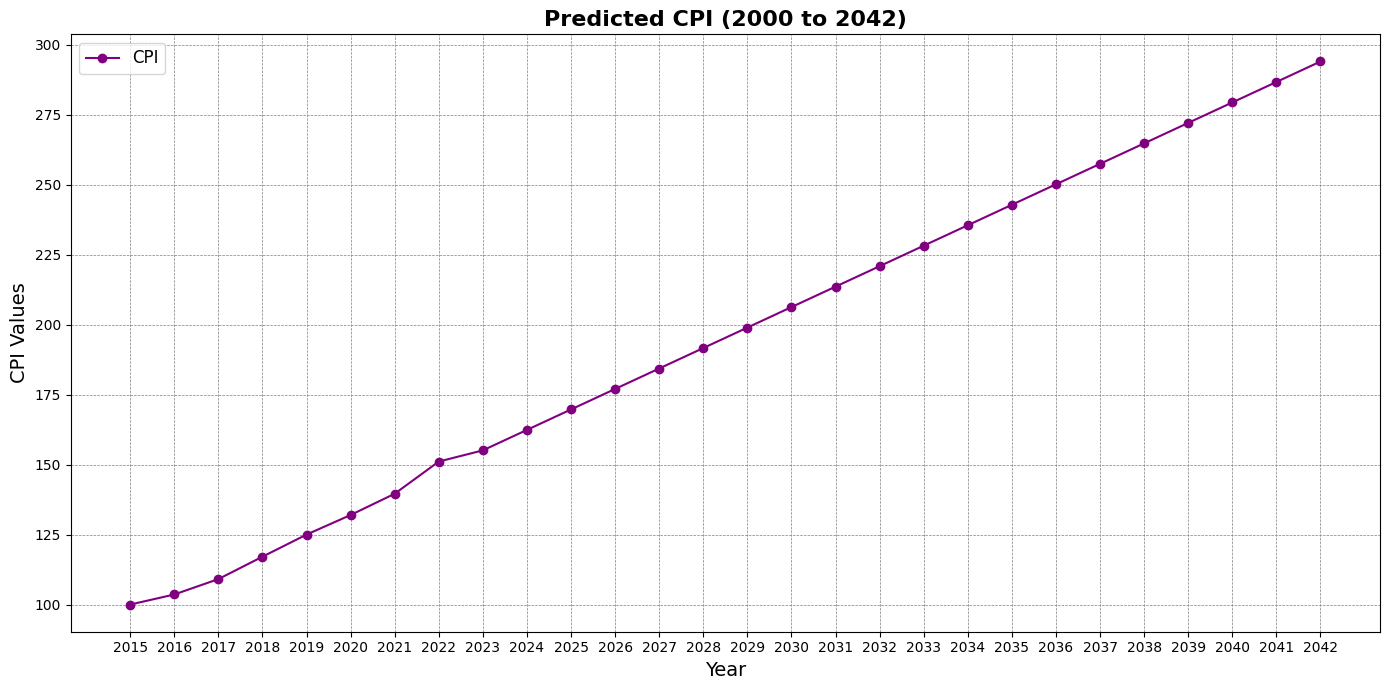

In [ ]:
# ----- Plot CPI -----
plt.figure(figsize=(14, 7))

# Plot CPI
plt.plot(
    df['annee'], df['cpi'],
    marker='o', label='CPI', color='purple'
)

# Formatting the plot
plt.title('Predicted CPI (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('CPI Values', fontsize=14)
plt.xticks(range(2015, 2043, 1))
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


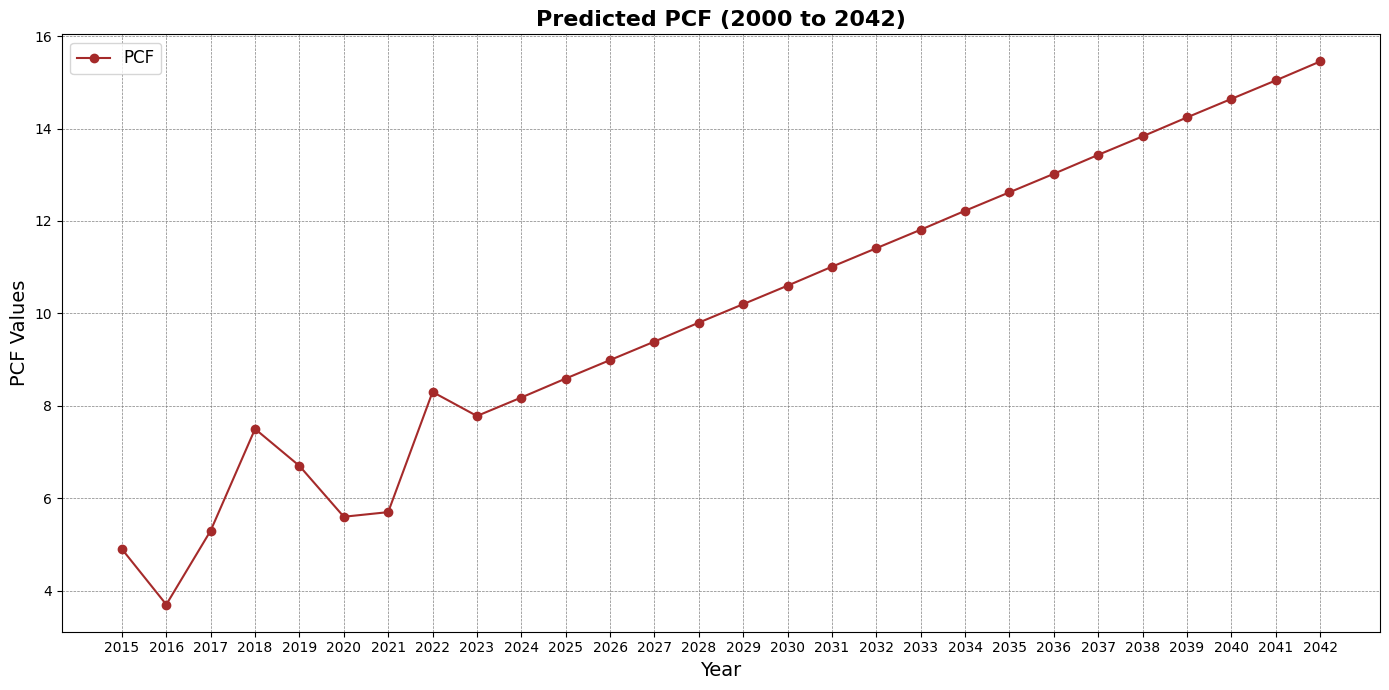

In [ ]:
# ----- Plot PCF -----
plt.figure(figsize=(14, 7))

# Plot PCF
plt.plot(
    df['annee'], df['pcf'],
    marker='o', label='PCF', color='brown'
)

# Formatting the plot
plt.title('Predicted PCF (2000 to 2042)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('PCF Values', fontsize=14)
plt.xticks(range(2015, 2043, 1))
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()
